In [1]:
###########################################################
# Programa: Circuitos_2_lab_1_RLC
# Data criação: 12/03/2021; Data ultima comp: 12/03/2021 
# Autor: Fernando Cardoso ; Versão 1.0
# Descrição: O programa deve calcular as respostas de 
#            frequencia de um RLC
# Modificações: 
###########################################################
################ Declaração das biblioteca#################
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from datetime import datetime

In [2]:
################ Declaração das definições#################
R=1000                                   #definir o valor da resistencia em ohms
L=1                                      #definir o valor da indutância em H
C=0.1*10**(-6)                           #definir o valor da capacitancia em F
A=15.00                                  #definir o valor da amplitude em V
numero=7                                 #nuemro de frequencias 
lista=[0.0]*numero                       #arrys de zeros
V_R=np.array(lista)                      #tensao sobre o resistor
fase_R=np.array(lista)                   #fase sobre o Resistor
V_L=np.array(lista)                      #tensao sobre o indutor
fase_L=np.array(lista)                   #fase sobre o indutor  
V_C=np.array(lista)                      #tensao sobre o capacitor
fase_C=np.array(lista)                   #fase sobre o capacitor
Z=np.array(lista)                        #impedancia
Z_complex=np.array(lista)                #parte complexa da impedancia
fase_Z=np.array(lista)                   #fase da impedancia   
impedancia=[0]*numero                    #objeto para concatenar as strings
I=np.array(lista)                        #corrente

In [3]:
############ Calculo dos parametros naturais #############
w0=mt.sqrt(1/(L*C))
g=R/(L*2*w0)
w=np.array([0.2,0.5,0.75,1,1.5,2,5])*w0  # os percentuais da frequencia natural

In [4]:
#################### Definição as FT  #####################
def H_R(w):
    H=(2*g*w0*w/mt.sqrt(mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow(2*g*w0*w,2)))
    return H
def H_C(w):
    H=(mt.pow(w0,2)/mt.sqrt(mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow(2*g*w0*w,2)))
    return H
def H_L(w):
    H=(mt.pow(w,2)/mt.sqrt(mt.pow(mt.pow(w0,2)-mt.pow(w,2),2)+mt.pow(2*g*w0*w,2)))
    return H

def theta_R(w):
    theta=np.arctan((mt.pow(w0,2)-mt.pow(w,2))/(2*g*w0*w))*360/(2*np.pi)
    return theta
def theta_C(w):
    theta=-np.arctan((2*g*w0*w)/(mt.pow(w0,2)-mt.pow(w,2)))*360/(2*np.pi)
    return theta
def theta_L(w):
    theta=np.arctan((2*g*w0*w)/(mt.pow(w0,2)-mt.pow(w,2)))*360/(2*np.pi)
    return theta

In [5]:
################## Calculo das amplitudes ###################
for i in range(0,numero):
    V_R[i]=round(H_R(w[i])*A,2)
    fase_R[i]=round(theta_R(w[i]),2)
    V_L[i]=round(H_L(w[i])*A,2)
    fase_L[i]=round(fase_R[i]+90,2)
    V_C[i]=round(H_C(w[i])*A,2)
    fase_C[i]=round(fase_R[i]-90,2)
    I[i]=round(V_R[i]*1000/R,2)
    Z[i]=round(R/H_R(w[i])/1000,2)
    fase_Z[i]=round(-fase_R[i],2)
    Z_complex[i]=round(Z[i]*np.sin(2*np.pi*fase_R[i]/360),2)
    #w[i]=mt.floor(w[i])
    w[i]=round(w[i],2)
    impedancia[i]=str(Z_complex[i])+'j+'+str(1)
    #print("{:.2f}".format(w[i]),V_R[i],fase_R[i],V_L[i],fase_L[i],V_C[i],fase_C[i])

In [6]:
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S%MS")

In [7]:
df=pd.DataFrame(list(zip(w,V_R,fase_R,V_L,fase_L,V_C,fase_C,I,impedancia,Z,fase_Z)),
                columns=['\u03C9','V_R','fase_R','V_L','fase_L','V_C',
                         'fase_C','I(mA)','R+Xj(K\u03A9)','Z','fase_Z(K\u03A9)'])
df.style.hide_index()
df
df.to_csv ('d:\RLC_'+dt_string+'.csv', index = False, header=True,sep ='\t')


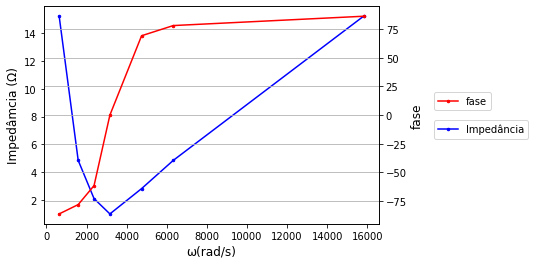

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('\u03C9(rad/s)'             ##### etiqueta_eixo_x
           ,fontsize=12                ##### Fonte_do_eixo_x
          )                           
plt.ylabel('Impedâmcia (\u03A9)'       ##### etiqueta_eixo_y
           ,fontsize=12                ##### Fonte_do_eixo_y
          )

ax.plot(w,Z                            ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
        ,'b'
        ,label='Impedância'            ##### etiqueta serie de dados
        ,markersize=5                  ##### tamanho do marcador
        ,marker="."                    ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
       )
ax2=ax.twinx()
ax2.plot(w,fase_Z                      ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
        ,'r'     
        ,label='fase'                  ##### etiqueta serie de dados
        ,markersize=5                  ##### tamanho do marcador
        ,marker="."                    ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
       )
ax2.set_ylabel("fase",fontsize=12)
ax.legend(loc='upper left',            ##### ativa as legendas
          bbox_to_anchor=(1.15, 0.5)) 
ax2.legend(loc='lower left',           ##### ativa as legendas
          bbox_to_anchor=(1.15, 0.5)) 
plt.grid()
plt.show() 

In [337]:
medidas_V_R=[]
medidas_V=[]
medidas_Z=[0.0]*numero
medidas_fase_R=[]
medidas_fase_Z=[]
for i in range(0,numero):
    medidas_Z[i]=R*medidas_V=[i]/medidas_V_R=[i]
    medidas_fase_Z[i]=-medidas_fase_R[i]


SyntaxError: can't assign to operator (<ipython-input-337-b8ff3cc38318>, line 7)

NameError: name 'medidas_Z' is not defined

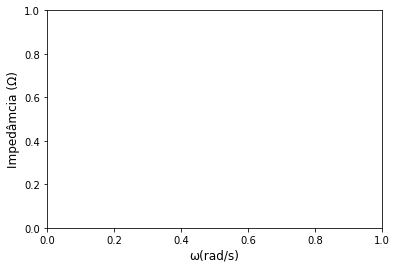

In [338]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('\u03C9(rad/s)'                                              ##### etiqueta_eixo_x
           ,fontsize=12                                    ##### Fonte_do_eixo_x
          )                           
plt.ylabel('Impedâmcia (\u03A9)'                                ##### etiqueta_eixo_y
           ,fontsize=12                                    ##### Fonte_do_eixo_y
          )

ax.plot(w,medidas_Z                                              ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
        ,'b'
        ,label='Impedância'                             ##### etiqueta serie de dados
        ,markersize=5                                      ##### tamanho do marcador
        ,marker="."                                        ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
       )
ax2=ax.twinx()
ax2.plot(w,medidas_fase_Z                                              ##### cor do eixo (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
        ,'r'
        ,label='fase'                             ##### etiqueta serie de dados
        ,markersize=5                                      ##### tamanho do marcador
        ,marker="."                                        ##### tipo do marcador (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)
       )
ax2.set_ylabel("fase",fontsize=12)
ax.legend(loc='upper left',                               ##### ativa as legendas
          bbox_to_anchor=(1.15, 0.5)) 
ax2.legend(loc='lower left',                               ##### ativa as legendas
          bbox_to_anchor=(1.15, 0.5)) 
plt.grid()
plt.show() 